In [30]:
import pyreadstat
import urllib.request
import scipy.stats as stats

# url에 있는 파일을 로컬 컴퓨터에 다운로드 한다.
url = 'https://hmkang98.github.io/spss/bar/bmi2.sav'
local_path = 'c:/data/bmi2.sav'
urllib.request.urlretrieve(url, local_path)

# spss 파일을 읽는다.
bmi, meta = pyreadstat.read_sav(local_path)

# 가설 설정
H0 = 175

# 성별이 2인 경우는 남성
mheight = bmi[bmi.성별==2].키


# t-검정 수행
t_statistic, p_value = stats.ttest_1samp(mheight,H0)

# 통계량과 p_value 출력
print(f"t-statistic is {t_statistic:.2f}")
print(f"p-value is {p_value:.4f}")

171.3684210526316
t-statistic is -3.10
p-value is 0.0062


In [42]:
import pyreadstat
import urllib.request
import scipy.stats as stats
from scipy.stats import levene

# url에 있는 파일을 로컬 컴퓨터에 다운로드 한다.
url = 'https://hmkang98.github.io/spss/bar/bmi2.sav'
local_paht='c:/data/bmi2.sav'
urllib.request.urlretrieve(url,local_path)

# spss 파일을 읽는다.
bmi, meta = pyreadstat.read_sav(local_path)

# 성별에 따른 키 데이터 추출
mheight = bmi[bmi.성별==2].키
fheight = bmi[bmi.성별==1].키

# 등분산 검정
f_statistic, p_value = levene(mheight,fheight)

# 통계량과 p_value 출력
print("등분산성 검정결과")
print(f"F-statistic is {f_statistic:.2f}")
print(f"p-value is {p_value:.4f}\n")

# t-검정 수행
t_statistic, p_value = stats.ttest_ind(mheight,fheight)

# 통계량과 p_value 출력
print("독립인 두 집단 평균 비교 검정")
print(f"t-statistic is {t_statistic:.2f}")
print(f"p-value is {p_value:.4f}")



등분산성 검정결과
F-statistic is 0.26
p-value is 0.6113

독립인 두 집단 평균 비교 검정
t-statistic is 9.65
p-value is 0.0000


In [1]:
import pyreadstat
import urllib.request
import scipy.stats as stats

# url에 있는 파일을 로컬 컴퓨터에 다운로드 한다.
url = 'https://hmkang98.github.io/spss/t-test/pairedsample2.sav'
local_path = 'c:/data/pairedsample2.sav'
urllib.request.urlretrieve(url,local_path)

# spss 파일을 읽는다.
patients, meta = pyreadstat.read_sav(local_path)

# 차이를 구할 데이터 추출
before = patients.치료전
after = patients.치료후

# t-검정 수행
t_statistic, p_value = stats.ttest_rel(before,after)

# 통계량과 p_value 출력
print(f't-statistic is {t_statistic:.2f}')
print(f'p-value is {p_value:.4f}')

C:\Users\hmkang\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


t-statistic is 3.77
p-value is 0.0044


In [94]:
import pyreadstat
import urllib.request
from scipy.stats import ttest_rel,levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

url = 'https://hmkang98.github.io/spss/t-test/anova2way2.sav'
local_path = 'c:/data/anova2way2.sav'
urllib.request.urlretrieve(url,local_path)

factor1, meta = pyreadstat.read_sav(local_path)

grpA1 = factor1[factor1.grpA == 1].값
grpA2 = factor1[factor1.grpA == 2].값
grpA3 = factor1[factor1.grpA == 3].값

grpB1 = factor1[factor1.grpB == 1].값
grpB2 = factor1[factor1.grpB == 2].값
grpB3 = factor1[factor1.grpB == 3].값

# 요인 값에 대한 기술통계
desc1 = factor1.groupby('grpA').값.describe()
desc2 = factor1.groupby('grpB').값.describe()

# 요인 값에 대한 기술통계 출력
print(desc1,'\n')
print(desc2,'\n')

# A 요인 등분산성 검정
f_statistic, p_value = levene(grpA1,grpA2,grpA3)

# A 요인 등분산성 검정 결과
print('\n A 요인 등분산성 검정 결과')
print(f'F-statist is {f_statistic:.2f}')
print(f'P-value is {p_value:.4f}\n')

# B 요인 등분산성 검정
f_statistic, p_value = levene(grpB1,grpB2,grpB3)

# B 요인 등분산성 검정 결과
print('\n B 요인 등분산성 검정 결과')
print(f'F-statistic is {f_statistic:.2}')
print(f'P-value is {p_value:.4}')

# A 요인 일원배치 분산분석 수행
f_statistic, p_value = f_oneway(grpA1,grpA2,grpA3)

# A 요인 일원배치 분산분석 결과 출력
print('\n A 요인 일원배치 분산분석 검정 결과')
print(f'F-statistic is {f_statistic:.2}')
print(f'P-value is {p_value:.4}\n')

# B 요인 일원배치 분산분석 수행
f_statistic, p_value = f_oneway(grpB1,grpB2,grpB3)

# B 요인 일원배치 분산분석 결과 출력
print('\n B 요인 일원배치 분산분석 검정 결과')
print(f'F-statistic is {f_statistic:.2}')
print(f'P-value is {p_value:.4}')      

# 사후분석 Tukey, Duncan 방밥
tukey = pairwise_tukeyhsd(factor1.값,factor1.grpB)
duncan = MultiComparison(factor1.값,factor1.grpB).tukeyhsd()

print('\nTukey multiple comparison result\n')
print(tukey)

print('\nDuncan multiple comparison result \n')
print(duncan)

factor1.info()

      count       mean       std   min   25%   50%   75%   max
grpA                                                          
1.0    15.0  51.933333  7.085868  41.0  45.5  53.0  57.0  62.0
2.0    15.0  54.933333  6.922702  45.0  49.0  55.0  60.0  68.0
3.0    15.0  55.266667  8.013085  43.0  47.5  56.0  60.5  69.0 

      count       mean       std   min   25%   50%   75%   max
grpB                                                          
1.0    13.0  47.461538  4.539005  41.0  45.0  47.0  49.0  56.0
2.0    15.0  53.333333  5.677860  43.0  50.0  54.0  58.0  62.0
3.0    17.0  59.705882  5.913594  45.0  56.0  60.0  63.0  69.0 


 A 요인 등분산성 검정 결과
F-statist is 0.11
P-value is 0.9000


 B 요인 등분산성 검정 결과
F-statistic is 0.61
P-value is 0.5493

 A 요인 일원배치 분산분석 검정 결과
F-statistic is 0.93
P-value is 0.4009


 B 요인 일원배치 분산분석 검정 결과
F-statistic is 1.9e+01
P-value is 1.619e-06

Tukey multiple comparison result

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   u

변수에 대한 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   값        45 non-null     float64
 1   grpA     45 non-null     float64
 2   grpB     45 non-null     float64
 3   grpA1    45 non-null     float64
 4   grpA2    45 non-null     float64
 5   grpB1    45 non-null     float64
 6   grpB2    45 non-null     float64
 7   grpA1B1  45 non-null     float64
 8   grpA1B2  45 non-null     float64
 9   grpA2B1  45 non-null     float64
 10  grpA2B2  45 non-null     float64
dtypes: float64(11)
memory usage: 4.0 KB
None 

각 요인에 대한 기술통계량
      count       mean       std   min   25%   50%   75%   max
grpA                                                          
1.0    15.0  51.933333  7.085868  41.0  45.5  53.0  57.0  62.0
2.0    15.0  54.933333  6.922702  45.0  49.0  55.0  60.0  68.0
3.0    15.0  55.266667  8.013085  43.0  47.5  56.0  60.5  69.0 

      count 

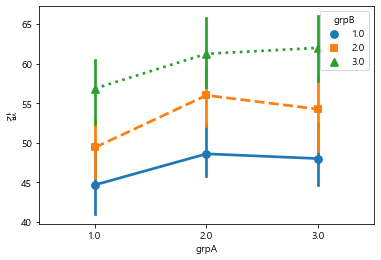

In [97]:
import pyreadstat
import urllib.request
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

url = 'https://hmkang98.github.io/spss/t-test/anova2way2.sav'
local_path = 'c:/data/anova2way2.sav'
urllib.request.urlretrieve(url,local_path)

factor2, meta = pyreadstat.read_sav(local_path)

# 자료에 대한 정보 확인. 자료 갯수, 변수 정보 등
print('변수에 대한 정보\n')
print(factor2.info(),'\n')

# 두 요인간 교호작용이 있는지 그래프로 확인
sns.pointplot(x=factor2.grpA,y=factor2.값,hue=factor2.grpB,markers=['o','s','^'],linestyles=['-','--',':'])

# 요인 값에 대한 기술통계
desc1 = factor2.groupby('grpA').값.describe()
desc2 = factor2.groupby('grpB').값.describe()
desc3 = factor2.groupby(['grpA','grpB']).값.describe()

# 요인 값에 대한 기술통계 출력
print('각 요인에 대한 기술통계량')
print(desc1,'\n')
print(desc2,'\n')
print(desc3,'\n')

model = '값~C(grpA)'
anova = ols(model,data=factor2).fit()
print('A 요인에 대한 일원배치 분산분석')
print(anova_lm(anova),'\n')

model = '값~C(grpB)'
anova = ols(model,data=factor2).fit()
print('B 요인에 대한 일원배치 분산분석')
print(anova_lm(anova),'\n')

# 모형 설정
model = '값 ~ C(grpA) * C(grpB)'

# 모형 적합
two_anova = ols(model,data=factor2).fit()

# 모형에 대한 분산분석표
print('A,B 요인에 대한 이원배치 분산분석(기본값)')
print(anova_lm(two_anova),'\n')
print('A,B 요인에 대한 이원배치 분산분석(Type=1)')
print(anova_lm(two_anova,typ=1),'\n')
print('A,B 요인에 대한 이원배치 분산분석(Type=2)')
print(anova_lm(two_anova,typ=2),'\n')
print('A,B 요인에 대한 이원배치 분산분석(Type=3)')
print(anova_lm(two_anova,typ=3),'\n')